In [1]:
%matplotlib inline
import numpy as np
from sklearn.linear_model import Ridge

def repetition_entrainement(lbda):
    # Répète l'entraînement d'une régression polynômiale, avec régulariation lbda
    
    # Nombre de répétitions d'entraînement
    s_repetitions = 500
    
    # Variance du bruit sur les cibles
    variance_bruit = 0.5
    
    # Nombre d'exemples d'entraînement pour chaque répétition
    N = 20
    
    # Nombre de fonctions de base (i.e. le degré du polynôme est M-1)
    M = 6

    # Fonctions de base polynomiales
    def fonctions_de_base(input):
        return input**np.arange(M)

    # Simulation des s_repetitions
    x_s = []
    t_s = []
    modele_s = []
    for s in range(s_repetitions):
        # Génération des N entrées
        x = np.random.rand(N,1)
        
        # Calcul des fonctions de base
        phi = fonctions_de_base(x)
        
        # Génération des cibles (avec bruit de variance : variance_bruit)
        t = np.sin(x*2*np.pi)+np.sqrt(variance_bruit)*np.random.randn(N,1)
        
        # Entraînement de la régression linéaire
        m = Ridge(alpha=lbda)
        m.fit(phi,t)
        
        # On garde la simulation dans une liste (entrées : x_s, cibles : t_s, modèles : modele_s)
        x_s.append(x)
        t_s.append(t)
        modele_s.append(m)
        
    import matplotlib.pyplot as plot
    
    # Valeurs de x auxquelles on va évaluer le régresseur
    input_space = np.linspace(0.0, 1.0).reshape((-1,1))
    
    # Illustration des 4 premiers modèles entraînés, avec leur ensemble d'entraînement respectif
    n_plots = 4
    plot.subplots(figsize=(20,3))
    for i in range(n_plots):
        plot.subplot(1,n_plots+1,1+i)
        plot.title('Simulation #'+str(i+1))
        # Modèle entraîné y(x,w)
        plot.plot(input_space, modele_s[i].predict(fonctions_de_base(input_space)),'k')
        # Fonction E[t|x] que l'on cherche (la meilleure solution possible)
        plot.plot(input_space, np.sin(input_space*2*np.pi),'g')
        # Ensemble d'entraînement
        plot.scatter(x_s[i].flatten(),t_s[i])
        plot.ylim([-1,2])
        
    # Illustration de tous les modèles entraînés et du modèle moyen
    plot.subplot(1,n_plots+1,n_plots+1)
    plot.title('Tous les '+str(s_repetitions)+' modeles')
    avg = np.zeros((len(input_space),1))
    for s in range(s_repetitions):
        pred_s = modele_s[s].predict(fonctions_de_base(input_space))
        plot.plot(input_space, pred_s,color='0.8')
        plot.ylim([-1,2])
        avg += pred_s
    avg /= s_repetitions
    # Fonction E[t|x] que l'on cherche (la meilleure solution possible)
    plot.plot(input_space, np.sin(input_space*2*np.pi),'g',linewidth=2)
    # Moyenne du modèle entraîné
    plot.plot(input_space, avg.flatten(),'b',linewidth=2)
    plot.ylim([-1,2])

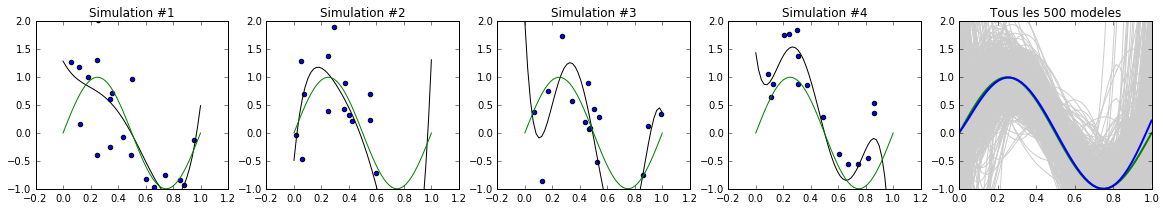

In [2]:
repetition_entrainement(0)

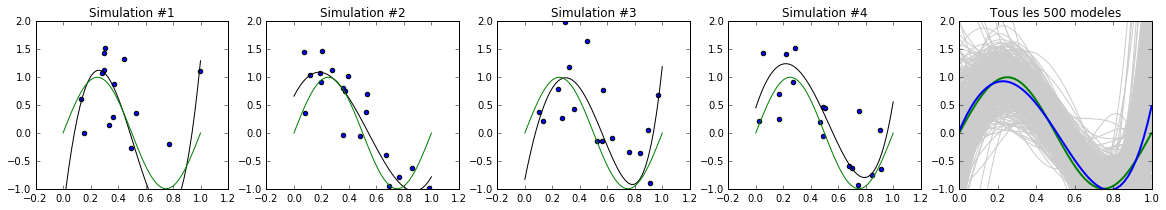

In [3]:
repetition_entrainement(1e-4)

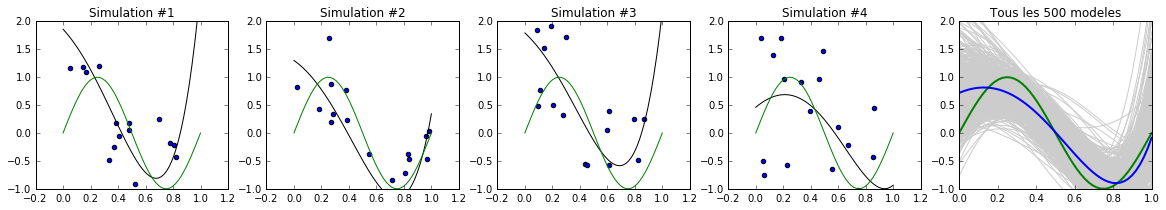

In [4]:
repetition_entrainement(1e-2)

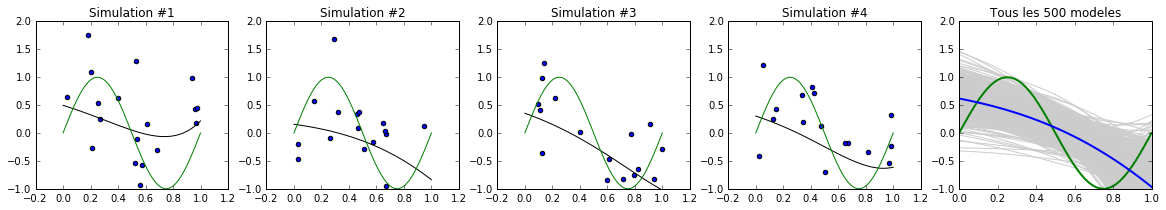

In [5]:
repetition_entrainement(1)

In [6]:
# Inverser une matrice
A = np.random.rand(3,3)
inv_A_1 = np.linalg.inv(A)
print(np.dot(A,inv_A_1))

[[  1.00000000e+00   0.00000000e+00  -1.11022302e-16]
 [ -3.12250226e-17   1.00000000e+00   0.00000000e+00]
 [ -6.07153217e-18   0.00000000e+00   1.00000000e+00]]


In [7]:
# Façon inefficace de multiplier par l'inverse d'une matrice 
A = np.random.rand(1500,1500)
b = np.random.rand(1500)
%timeit np.dot(np.linalg.inv(A),b)
print (np.dot(np.linalg.inv(A),b))

1 loop, best of 3: 1.31 s per loop
[ 0.79579084 -0.77001723  0.57709089 ...,  1.15238564  0.27770165
 -2.28136476]


In [8]:
# Façon efficace de multiplier par l'inverse d'une matrice : résoudre le système d'équations A x = b
%time np.linalg.solve(A,b)
print (np.linalg.solve(A,b))

Wall time: 352 ms
[ 0.79579084 -0.77001723  0.57709089 ...,  1.15238564  0.27770165
 -2.28136476]
